### Optimization 

In [190]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  - generating random Data 

In [191]:
X=np.linspace(0, 20, num=50)
a=-2
b=1
y=[]
y=a*X+b
print(X)
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.6734

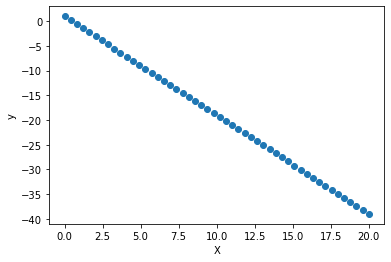

In [192]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y');

In [193]:
X = np.hstack((np.ones(X.shape[0]).reshape(-1,1),X.reshape(-1,1)))
y = y.reshape(-1,1)
thetas = np.zeros(X.shape[1]).reshape(-1,1)

### - Batch Gradient Descent:

In [223]:
#gradient descent batch 
def Batch_GD(x,y,thetas,lrate,iters):
    temp = np.zeros(thetas.shape[0])
    costarr = np.zeros(iters)
    thet1 = np.zeros(iters)
    thet2 = np.zeros(iters)
    for i in range(iters):
        err= (x@thetas - y)
        mse = np.linalg.norm(err)**2 / (2*len(x))
        for j in range(len(thetas)):
            temp[j] = thetas[j] - (x[:,j]@err) *lrate /len(x)
        thet1[i], thet2[i] = temp[0], temp[1]
        thetas = temp
        thetas = thetas.reshape(-1,1)
        costarr[i] = mse
        
    return thet1,thet2, thetas, costarr
    

In [299]:
GD_t1, GD_t2, GD_thetas, GD_cost = Batch_GD(X,y,thetas,0.001,1000)
GD_thetas, GD_cost

(array([[ 0.1157556 ],
        [-1.93422646]]),
 array([2.49887755e+02, 1.86825449e+02, 1.39688375e+02, 1.04454902e+02,
        7.81189884e+01, 5.84337157e+01, 4.37195838e+01, 3.27212202e+01,
        2.45002744e+01, 1.83553593e+01, 1.37622107e+01, 1.03289577e+01,
        7.76268963e+00, 5.84446491e+00, 4.41063185e+00, 3.33886605e+00,
        2.53773393e+00, 1.93889181e+00, 1.49125501e+00, 1.15663933e+00,
        9.06503341e-01, 7.19513216e-01, 5.79722612e-01, 4.75212149e-01,
        3.97072471e-01, 3.38644120e-01, 2.94949365e-01, 2.62267512e-01,
        2.37817461e-01, 2.19520430e-01, 2.05822593e-01, 1.95562519e-01,
        1.87872073e-01, 1.82102353e-01, 1.77768323e-01, 1.74507439e-01,
        1.72048706e-01, 1.70189567e-01, 1.68778617e-01, 1.67702683e-01,
        1.66877175e-01, 1.66238863e-01, 1.65740484e-01, 1.65346713e-01,
        1.65031143e-01, 1.64774036e-01, 1.64560641e-01, 1.64379928e-01,
        1.64223656e-01, 1.64085664e-01, 1.63961345e-01, 1.63847258e-01,
        1.637408

In [300]:
#evaluating the model by calculating r2 score
from sklearn.metrics import r2_score
pred_val = X@GD_thetas
scor_r2=r2_score(pred_val,y)
print('Scor_r2 : ', scor_r2)

Scor_r2 :  0.9984483752966259


#### Darwing loss vs epochs

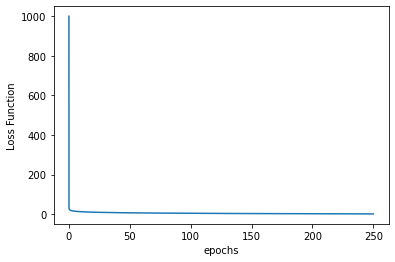

In [303]:
epochs = list(range(1,len(GD_cost)+1))
plt.xlabel('epochs')
plt.ylabel('Loss Function')
plt.plot(GD_cost,epochs);

##### -Darwing thetas vs loss function

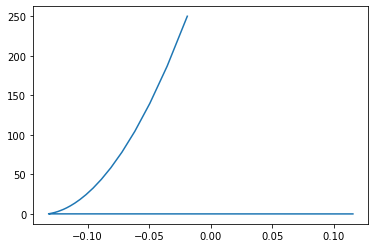

In [304]:
plt.plot(GD_t1,GD_cost);

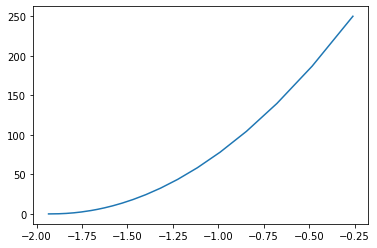

In [305]:
plt.plot(GD_t2,GD_cost);

#### -Plotting all regression lines till converge:

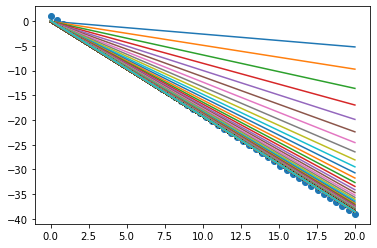

In [306]:
plt.scatter(X[:,1],y)
for i in range(1000):
    y_predict = GD_t1[i] + GD_t2[i]*X[:,1]
    plt.plot(X[:,1],y_predict)

##### - the best fit line :

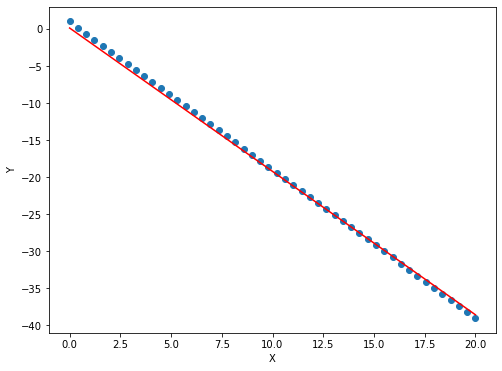

In [307]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X[:,1],X@GD_thetas, color='r' );



### - Stochastic Gradient Descent:

In [407]:
#stochastic gradient descent 
def st_GD(x,y,thetas,iters,lrate):
    temp = np.zeros(thetas.shape[0])
    thet1 = []
    thet2 = []
    costarr = []
    for i in range(iters):
        for j in range(len(x)):
            err = x[j,:]@thetas - y[j,:]
            costarr.append((err**2 / 2*len(x)))
            for k in range(len(thetas)):
                grd = err*x[j,k]
                temp[k] = thetas[k] - (lrate*grd)
            thetas = temp
            thet1.append( temp[0])
            thet2.append( temp[1]) 
            thetas = thetas.reshape(-1,1)
    return thet1, thet2, thetas, costarr

In [430]:
ST_t1, ST_t2, ST_thetas, ST_cost = st_GD(X,y,thetas,1000,0.001)

In [431]:
len(ST_cost)

50000

In [432]:
#evaluating the model by calculating r2 score
from sklearn.metrics import r2_score
pred_val = X@ST_thetas
scor_r2=r2_score(pred_val,y)
print('Scor_r2 : ', scor_r2)

Scor_r2 :  0.999999999999317


#### Darwing loss vs iterations :

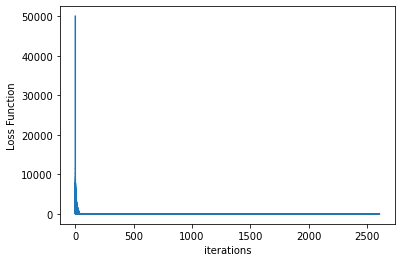

In [433]:
epochs = list(range(1,len(ST_cost)+1))
plt.xlabel('iterations')
plt.ylabel('Loss Function')
plt.plot(ST_cost,epochs);

#### Darwing loss vs thetas :

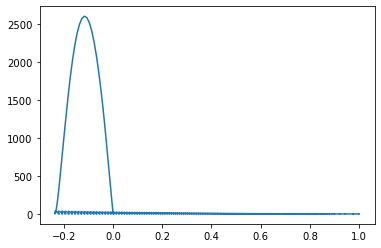

In [434]:
plt.plot(ST_t1,ST_cost);

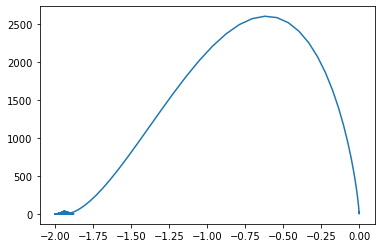

In [435]:
plt.plot(ST_t2,ST_cost);

#### -Plotting all regression lines till converge:

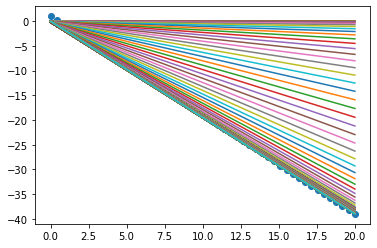

In [436]:
plt.scatter(X[:,1],y)
for i in range(1000):
    y_predict = ST_t1[i] + ST_t2[i]*X[:,1]
    plt.plot(X[:,1],y_predict)

#### -Plotting best fit line:

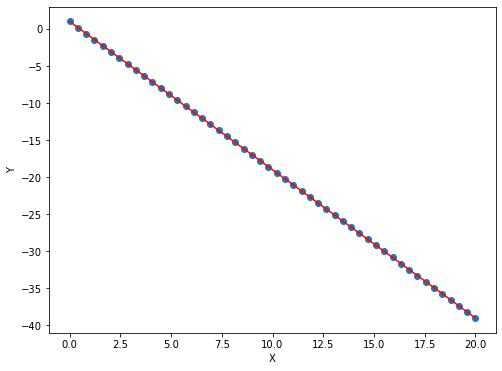

In [437]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X[:,1],X@ST_thetas, color='r' );

### - mini Batch Gradient Descent:

In [475]:
#minibatch grid descent
def min_batch_GD(data, thetas,rate,iters, batches):
    np.random.shuffle(data)
    temp = np.zeros(thetas.shape[0])
    batchsize = int(len(data)/batches)
    if len(data)%batches != 0:
        batches = int(len(data)/batchsize)
    costarr = []
    thet1 = []
    thet2 = []
    for e in range(iters):
        start = 0
        stop = batchsize
        for i in range(batches):
            err = data[start:stop,:-1]@thetas - data[start:stop,-1].reshape(-1,1)
            costarr.append(np.linalg.norm(err)**2 / (2*len(err)) )
            for p in range(len(thetas)):
                temp[p] = thetas[p] - ((data[start:stop,p]@err)/len(data) )*rate
            thetas = temp
            thet1.append(temp[0])
            thet2.append(temp[1])
            thetas = thetas.reshape(-1,1)
            start = stop
            stop+=batchsize
           
    return thet1, thet2, thetas, costarr

In [476]:
data = np.hstack((X,y))

In [510]:
mb_t1, mb_t2, mb_thetas, mb_cost = min_batch_GD(data, thetas, 0.01,1000,5)

In [511]:
#evaluating the model by calculating r2 score
from sklearn.metrics import r2_score
pred_val = X@mb_thetas
scor_r2=r2_score(pred_val,y)
print('Scor_r2 : ', scor_r2)

Scor_r2 :  0.9999855655206435


#### iterations vs loss:

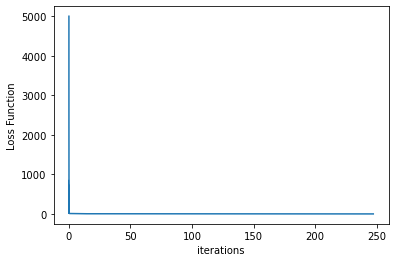

In [512]:
epochs = list(range(1,len(mb_cost)+1))
plt.xlabel('iterations')
plt.ylabel('Loss Function')
plt.plot(mb_cost,epochs);

#### thetas vs loss :

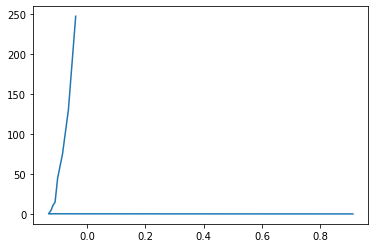

In [513]:
plt.plot(mb_t1,mb_cost);

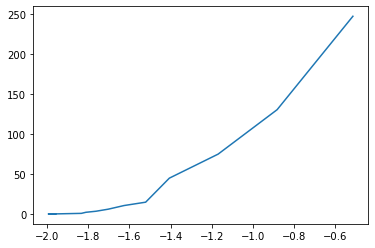

In [514]:
plt.plot(mb_t2,mb_cost);

#### plotting all lines till converge:

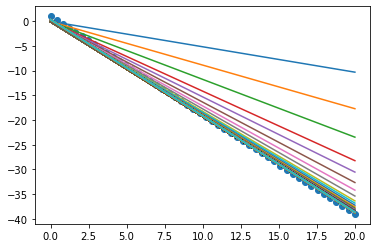

In [515]:
plt.scatter(X[:,1],y)
for i in range(1000):
    y_predict = mb_t1[i] + mb_t2[i]*X[:,1]
    plt.plot(X[:,1],y_predict)

#### Plotting best fit line :

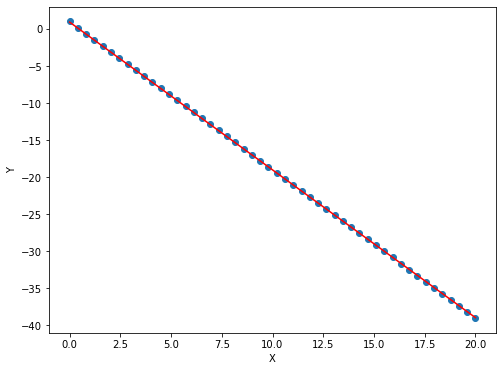

In [516]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X[:,1],X@mb_thetas, color='r' );

 #### - mumentom based- Gradient descent:

In [518]:
#mumentom optimization 
def mom_opt(x,y,thetas,iters,alpha,gamma):
    costarr = []
    thet1 = []
    thet2 = []
    tmp = np.zeros(thetas.shape[0])
    gradient = np.zeros(thetas.shape[0])
    v =np.zeros(thetas.shape[0]).reshape(-1,1)
    for k in range(iters):
        err = x@thetas - y
        costarr.append(np.linalg.norm(err)**2/(2*len(x)))
        for i in range(len(thetas)):
            gradient[i] = x[:,i]@err / len(x)
        v = gamma*v + alpha* gradient.reshape(-1,1) 
        for p in range(len(thetas)):
            tmp[p] = thetas[p] - v[p] 
        thetas = tmp
        thet1.append(tmp[0])
        thet2.append(tmp[1])
        thetas = thetas.reshape(-1,1)
    
    return thet1, thet2, costarr, thetas

In [521]:
mom_t1, mom_t2, mom_cost, mom_thetas = mom_opt(X,y,thetas,1000,0.001,.02)


In [524]:
#evaluating the model by calculating r2 score
from sklearn.metrics import r2_score
pred_val = X@mom_thetas
scor_r2=r2_score(pred_val,y)
print('Scor_r2 : ', scor_r2)

Scor_r2 :  0.9984650500234403


#### - cost vs iterations

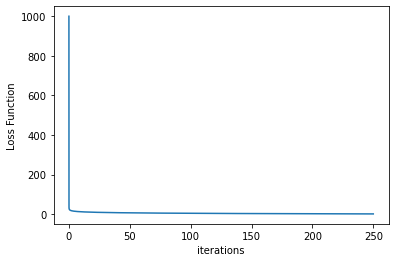

In [527]:
epochs = list(range(1,len(mom_cost)+1))
plt.xlabel('iterations')
plt.ylabel('Loss Function')
plt.plot(mom_cost,epochs);

#### - cost vs thetas:

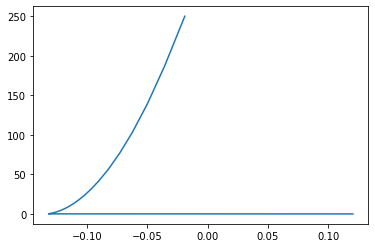

In [528]:
plt.plot(mom_t1,mom_cost);

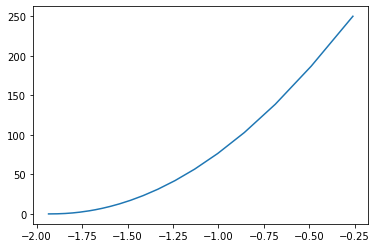

In [529]:
plt.plot(mom_t2,mom_cost);

#### - plotting all lines till converge:

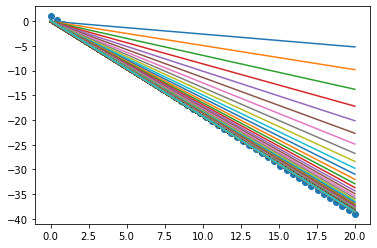

In [531]:
plt.scatter(X[:,1],y)
for i in range(1000):
    y_predict = mom_t1[i] + mom_t2[i]*X[:,1]
    plt.plot(X[:,1],y_predict)

#### - plotting bestfit line:

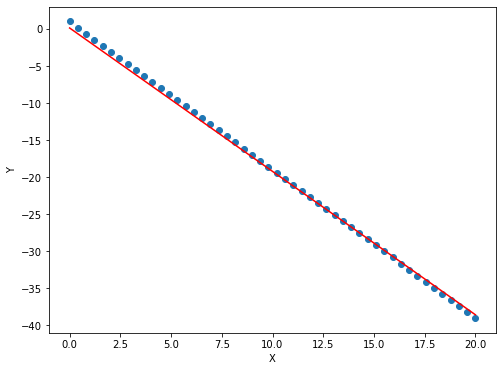

In [532]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X[:,1],X@mom_thetas, color='r' );

In [534]:
#Nag GD 
def Nag(x,y,thetas,iters, alpha, gamma):
    tmp = np.zeros(thetas.shape[0])
    thetatemp = np.zeros(thetas.shape[0])
    gradient = np.zeros(thetas.shape[0])
    v =np.zeros(thetas.shape[0]).reshape(-1,1)
    costarr = []
    thet1 = []
    thet2 = []
    for i in range(iters):
        for t in range(thetas.shape[0]):
            thetatemp[t] = thetas[t] - gamma*v[t]
        err = x@thetatemp.reshape(-1,1) - y
        costarr.append(np.linalg.norm(err)**2/(2*len(x)))
        for k in range(thetas.shape[0]):
            gradient[k] = x[:,k]@err / len(x)
        for p in range(thetas.shape[0]):
            tmp[p] = thetatemp[p] - gradient[p]*alpha
        thetas = tmp
        thet1.append(tmp[0])
        thet2.append(tmp[1])
        thetas = thetas.reshape(-1,1)
        v = gamma*v + gradient.reshape(-1,1)*alpha
    return thet1, thet2, costarr, thetas
        
        
            
            
        

In [539]:
Nag_t1, Nag_t2, Nag_cost, Nag_thetas = Nag(X,y,thetas,1000,0.001,0.05)

In [540]:
#evaluating the model by calculating r2 score
from sklearn.metrics import r2_score
pred_val = X@Nag_thetas
scor_r2=r2_score(pred_val,y)
print('Scor_r2 : ', scor_r2)

Scor_r2 :  0.9984909967932679


#### - cost vs iterations:

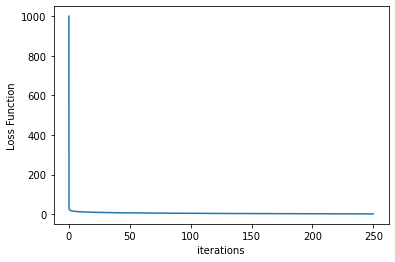

In [541]:
epochs = list(range(1,len(Nag_cost)+1))
plt.xlabel('iterations')
plt.ylabel('Loss Function')
plt.plot(Nag_cost,epochs);

##### - cost vs thetas

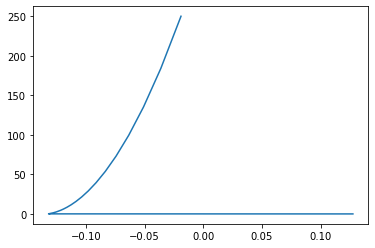

In [542]:
plt.plot(Nag_t1,Nag_cost);

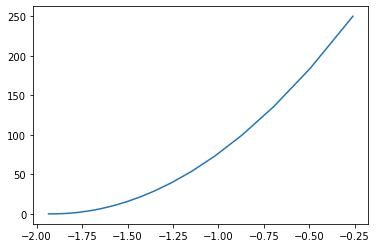

In [543]:
plt.plot(Nag_t2,Nag_cost);

#### - plotting all lines till converge:

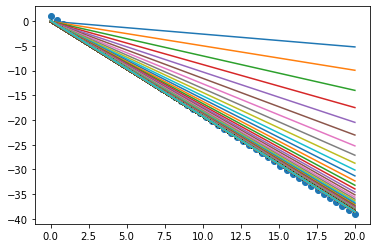

In [544]:
plt.scatter(X[:,1],y)
for i in range(1000):
    y_predict = Nag_t1[i] + Nag_t2[i]*X[:,1]
    plt.plot(X[:,1],y_predict)

#### - plotting best fit line:

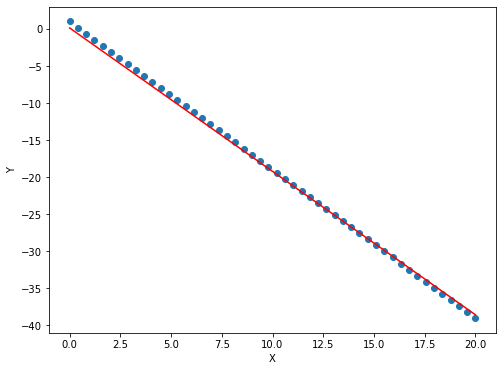

In [545]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X[:,1],X@Nag_thetas, color='r' );

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- trying adaptive learning rate methods:

#### - Adagrad:

In [548]:
##Adagrad 
def adagrad(x, y, thetas, iters, alpha):
    p = thetas.shape[0]
    temp = np.zeros(p)
    v = np.zeros(p)
    costarr = []
    thet1 = []
    thet2 = []
    gradient = np.zeros(p)
    for i in range(iters):
        err = x@thetas - y
        costarr.append(np.linalg.norm(err)**2/(2*len(x)))
        for j in range(p):
            gradient[j] = (x[:,j]@err )/len(x)   
        v = v + np.power(gradient,2)
        for k in range(p):
            temp[k] = thetas[k] - (alpha/((np.sqrt(v[k]))))* gradient[k] 
        thetas = temp
        thet1.append(temp[0])
        thet2.append(temp[1])
        thetas = thetas.reshape(-1,1)

    return thet1, thet2, costarr, thetas 

In [562]:
ada_t1, ada_t2, ada_cost, ada_thetas = adagrad(X, y, thetas, 1000, 0.09)

ada_cost

[249.88775510204087,
 225.4634173469388,
 209.37750732731868,
 196.895610691742,
 186.53463319785348,
 177.60784336268975,
 169.73185276709526,
 162.66721114107628,
 156.25266368111602,
 150.3735594467405,
 144.94496933691332,
 139.90192724908792,
 135.19343604791723,
 130.77860355329292,
 126.62405129944153,
 122.70211872974926,
 118.98958353358044,
 115.46672775764567,
 112.11664201036763,
 108.92469757795256,
 105.87813947018454,
 102.96576819387663,
 100.1776877153189,
 97.50510353864392,
 94.94015924331849,
 92.47580289718384,
 90.10567693642925,
 87.82402666694506,
 85.6256236806927,
 83.50570132174848,
 81.45989996498888,
 79.48422034494861,
 77.57498353449158,
 75.72879645185415,
 73.94252199136392,
 72.21325304295648,
 70.53828979969558,
 68.91511985913743,
 67.34140070976535,
 65.81494426252783,
 64.33370314330182,
 62.89575850758918,
 61.49930917604727,
 60.14266192018383,
 58.824222752992995,
 57.54248910047679,
 56.29604274768535,
 55.0835434677498,
 53.90372325488604,
 52

In [563]:
#evaluating the model by calculating r2 score
from sklearn.metrics import r2_score
pred_val = X@ada_thetas
scor_r2=r2_score(pred_val,y)
print('Scor_r2 : ', scor_r2)

Scor_r2 :  0.9879293748020564


#### - cost vs iterations:


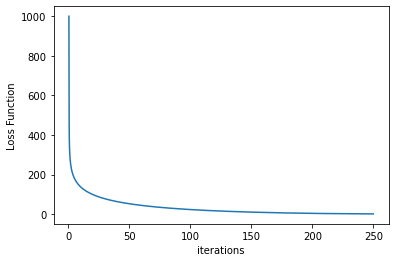

In [565]:
epochs = list(range(1,len(ada_cost)+1))
plt.xlabel('iterations')
plt.ylabel('Loss Function')
plt.plot(ada_cost,epochs);

#### - cost vs thetass:


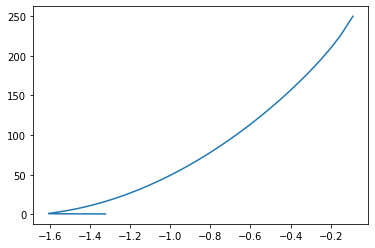

In [567]:
plt.plot(ada_t1,ada_cost);

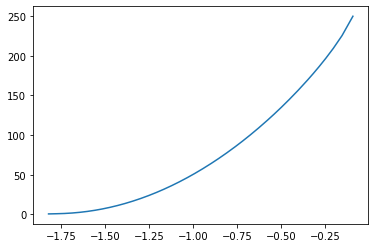

In [566]:
plt.plot(ada_t2,ada_cost);

#### - plotting all lines till converge:

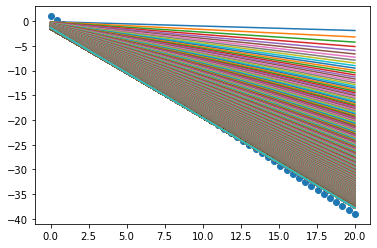

In [572]:
plt.scatter(X[:,1],y)
for i in range(1000):
    y_predict = ada_t1[i] + ada_t2[i]*X[:,1]
    plt.plot(X[:,1],y_predict)

#### - plotting  best fit line:

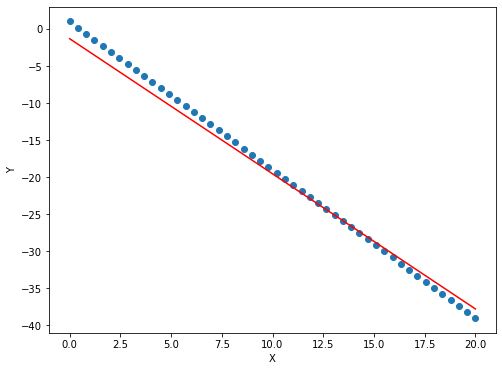

In [573]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X[:,1],X@ada_thetas, color='r' );

#### - RMSProp:

In [574]:
def RMSProp(x,y,thetas, iters, alpha, B):
    p = thetas.shape[0]
    temp = np.zeros(p)
    v = np.zeros(p)
    costarr = []
    thet1 = []
    thet2 = []
    gradient = np.zeros(p)
    for i in range(iters):
        err = x@thetas - y
        costarr.append(np.linalg.norm(err)**2/(2*len(x)))
        for j in range(p):
            gradient[j] = (x[:,j]@err )/len(x)   
        v = B*v + (1-B)*np.power(gradient,2)
        for k in range(p):
            temp[k] = thetas[k] - (alpha/((np.sqrt(v[k]))))* gradient[k] 
        thetas = temp
        thet1.append(temp[0])
        thet2.append(temp[1])
        thetas = thetas.reshape(-1,1)

    return thet1, thet2, costarr, thetas 
    

In [575]:
RMS_t1, RMS_t2, RMS_cost, RMS_thetas = RMSProp(X,y,thetas, 1000, 0.05, 10**-9)

In [576]:
#evaluating the model by calculating r2 score
from sklearn.metrics import r2_score
pred_val = X@RMS_thetas
scor_r2=r2_score(pred_val,y)
print('Scor_r2 : ', scor_r2)

Scor_r2 :  0.9948803637052033


#### - cost vs iterations:


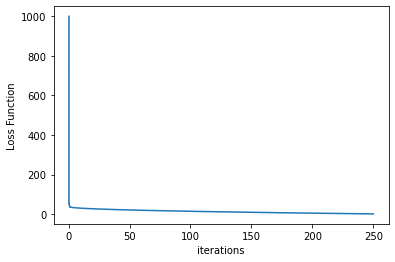

In [577]:
epochs = list(range(1,len(RMS_cost)+1))
plt.xlabel('iterations')
plt.ylabel('Loss Function')
plt.plot(RMS_cost,epochs);

#### - cost vs thetass:


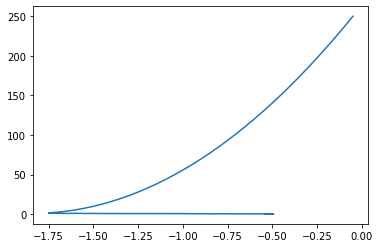

In [578]:
plt.plot(RMS_t1,RMS_cost);

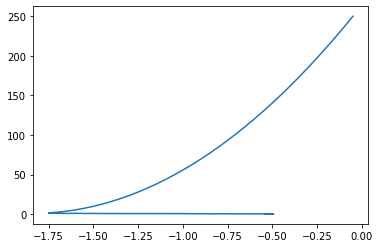

In [579]:
plt.plot(RMS_t1,RMS_cost);

#### - plotting all lines till converge:

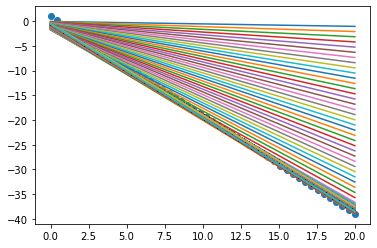

In [580]:
plt.scatter(X[:,1],y)
for i in range(1000):
    y_predict = RMS_t1[i] + RMS_t2[i]*X[:,1]
    plt.plot(X[:,1],y_predict)

#### - plotting  best fit line:

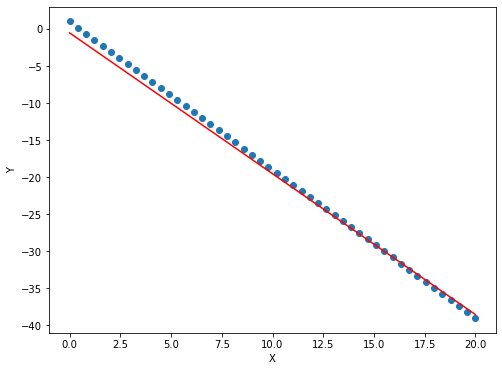

In [581]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X[:,1],X@RMS_thetas, color='r' );

#### - ADAM:

In [582]:
def ADAM(x, y, thetas, iters, alpha, B1, B2):
    p = thetas.shape[0]
    tmp = np.zeros(p)
    gradient = np.zeros(p)
    v = np.zeros(p)
    m = np.zeros(p)
    costarr = []
    thet1 = []
    thet2 = []
    c=0
    for i in range(iters):
        c+=1
        err = x@thetas - y
        costarr.append(np.linalg.norm(err)**2/(2*len(x)))
        for k in range(p):
            gradient[k] = (x[:,k]@err)/len(x)
        v = B1*v + (1-B1)*np.power(gradient,2)
        m = B2*m + (1-B2)*gradient
        v = v/1-B1**c
        m = m/1-B2**c
        for j in range(p):
            tmp[j] = thetas[j] - (alpha/(np.sqrt(v[j]) +10**-9))*m[j] 
        thetas = tmp
        thet1.append(tmp[0])
        thet2.append(tmp[1])
        thetas = thetas.reshape(-1,1)
    return  thet1,  thet2, costarr, thetas
    

In [590]:
ADAM_t1, ADAM_t2, ADAM_cost, ADAM_thetas = ADAM(X, y, thetas, 1000, 0.03, .04, .05)

In [591]:
#evaluating the model by calculating r2 score
from sklearn.metrics import r2_score
pred_val = X@ADAM_thetas
scor_r2=r2_score(pred_val,y)
print('Scor_r2 : ', scor_r2)

Scor_r2 :  0.9997905229233325


#### - cost vs iterations:


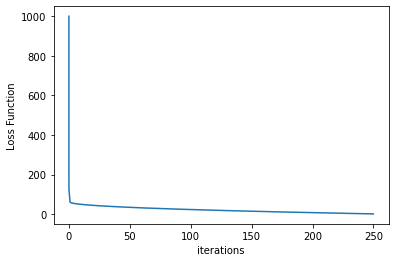

In [592]:
epochs = list(range(1,len(ADAM_cost)+1))
plt.xlabel('iterations')
plt.ylabel('Loss Function')
plt.plot(ADAM_cost,epochs);

#### - cost vs thetass:


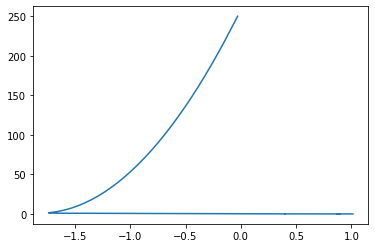

In [593]:
plt.plot(ADAM_t1,ADAM_cost);

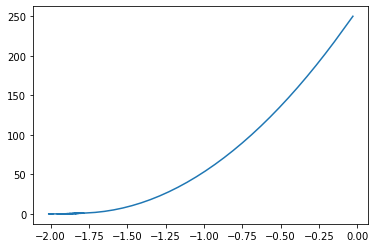

In [594]:
plt.plot(ADAM_t2,ADAM_cost);

#### - plotting all lines till converge:

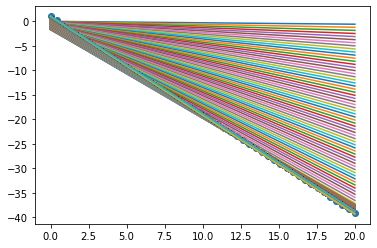

In [595]:
plt.scatter(X[:,1],y)
for i in range(1000):
    y_predict = ADAM_t1[i] + ADAM_t2[i]*X[:,1]
    plt.plot(X[:,1],y_predict)

#### - plotting  best fit line:

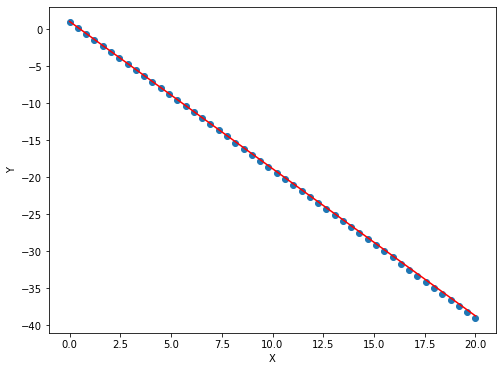

In [596]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X[:,1],X@ADAM_thetas, color='r' );

---------------------------------------------------